In [21]:
# import library
import numpy as np
import pandas as pd
import pylab as pl #untuk plotting
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

%matplotlib inline

In [22]:
encodings = ['utf-8', 'latin-1', 'cp1252']
for encoding in encodings:
    try:
        data = pd.read_csv('data_baru/calon-karyawan-ihbs-medsos.csv', encoding=encoding) # load data
        # Jika berhasil, keluar dari loop
        break
    except UnicodeDecodeError:
        pass

if data is None:
    print("Error: Tidak dapat mendekode data dengan pengkodean yang dicoba.")

data.head(834)

,Timestamp,Email Address,Score,Nama,Nomor handphone,Jenis kelamin,Nomor Induk Kependudukan (NIK),Alamat lengkap,Tinggi,Berat badan,...,IJAZAH,TRANSKRIP NILAI,"FILE PENDUKUNG (OPSIONAL,MAX 3)",nilai_psikotest,media_sosial,jumlah_unggahan,tingkat_interaksi,jumlah_pengikut,jenis_konten,rekomendasi
0,8/19/2022 11:20,adyantidina27@gmail.com,0,Dina Adyanti,8.121164e+10,perempuan,1.31E+15,"Komp.BBD Blok A1 No.8,Cimanggis,Depok",155 cm,50 kg,...,https://drive.google.com/open?id=1cRJe_Zid3ZIJ...,https://drive.google.com/open?id=199MUKqH9VHTs...,https://drive.google.com/open?id=1KCgZtUtDEwPt...,94,Twitter,22,27,88,Positif,Ditolak
1,8/19/2022 15:10,rafzan94@gmail.com,0,Rafi zahran nugraba,8.788167e+10,laki-laki,3.67E+15,pamulang permai 1 b38/35 rt 001 rw 014 pamulan...,170,79,...,https://drive.google.com/open?id=19K1F48egi-Rr...,https://drive.google.com/open?id=1Y0I2jn-iHJ80...,NaN,70,Twitter,0,23,74,Negatif,Ditolak
2,8/19/2022 16:19,ratnaps29@gmail.com,0,Ratna Purwitasari,8.158563e+10,perempuan,3.28E+15,"Jl. Gunung Gede 4 No 203 RT 001 RW 013, Kayur...",158,53,...,https://drive.google.com/open?id=1lmI6GyXRuS8V...,https://drive.google.com/open?id=16EqHnEcYb6Nj...,NaN,67,Facebook,3,11,71,Positif,Ditolak
3,8/19/2022 18:51,rudisap7@gmail.com,0,Rudisa Putra,8.138296e+10,laki-laki,1.31E+15,"Jl Lebak Sari, Tanjung Barat, Jakarta Selatan",171,50,...,https://drive.google.com/open?id=18uZCQ_SSGGud...,https://drive.google.com/open?id=12LppgmJQN2x1...,https://drive.google.com/open?id=1W13DubJfH-5v...,88,Linkedin,21,27,83,Negatif,Ditolak
4,8/19/2022 21:01,ichrishah93@gmail.com,0,Ichrishah Radzy,8.590000e+11,laki-laki,3.17E+15,Jl.papanggo II no 59 b Rt 015 Rw 003 Kel. Papa...,179,75,...,https://drive.google.com/open?id=1iZV4nD_ZrJvX...,https://drive.google.com/open?id=1OS9zsD68BHCK...,https://drive.google.com/open?id=1yoNClVdzL99f...,76,Linkedin,11,10,97,Positif,Ditolak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,8/16/2023 10:17,putrimellisaraisha314@gmail.com,0,Raisha Putri Mellisa,8.129907e+10,perempuan,3.28E+15,"Jalan Tumaritis, Harjamukti, Cimanggis Kota De...",160,77,...,https://drive.google.com/open?id=1Z-Tr5F2YL7I7...,https://drive.google.com/open?id=1SNbUvQi-RzoB...,https://drive.google.com/open?id=1tSXTZdtcX6KV...,92,Twitter,0,13,86,Positif,Ditolak
830,8/16/2023 11:11,irvan920@gmail.com,0,Irvan Erlangga,8.177657e+10,laki-laki,3.18E+15,Jalan Gandaria 3 Gg. H. Laib No. 9C RT012/002 ...,168,70,...,https://drive.google.com/open?id=1subn2gmBH41t...,https://drive.google.com/open?id=1kOAVrS5MvFm-...,https://drive.google.com/open?id=1_xlXmf6njFFL...,65,Linkedin,0,28,101,Positif,Diterima
831,8/17/2023 6:39,1suhelmi2014@gmail.com,0,Mohamad Rizky Suhelmi,8.968397e+10,laki-laki,3.18E+15,"JL. Madrasah RT.05 RW.01 NO.118A Bambu Apus, C...",173,95,...,https://drive.google.com/open?id=1sIVQdC9gI_te...,https://drive.google.com/open?id=1e78d5xpgv3CV...,NaN,89,Linkedin,12,10,85,Negatif,Ditolak
832,8/18/2023 14:48,syfmf781@gmail.com,0,SYIFA MARFI FADILAH,8.950000e+11,perempuan,3.21E+15,Desa Kertabasuki Blok Kamis RT/RW 001/005 Kec....,155,45,...,https://drive.google.com/open?id=1TN5avDk0lswP...,https://drive.google.com/open?id=1HTkgeaH_ufW7...,https://drive.google.com/open?id=1QAIifPZ6vv2x...,86,Twitter,6,15,71,Positif,Ditolak


In [23]:
cdata = data[['Nama','IPK_NA','nilai_psikotest','jumlah_unggahan','tingkat_interaksi','jumlah_pengikut']]
cdata.head(834)

,Nama,IPK_NA,nilai_psikotest,jumlah_unggahan,tingkat_interaksi,jumlah_pengikut
0,Dina Adyanti,8,94,22,27,88
1,Rafi zahran nugraba,2.84,70,0,23,74
2,Ratna Purwitasari,3.45,67,3,11,71
3,Rudisa Putra,4.4,88,21,27,83
4,Ichrishah Radzy,2.82,76,11,10,97
...,...,...,...,...,...,...
829,Raisha Putri Mellisa,3.38,92,0,13,86
830,Irvan Erlangga,3.55,65,0,28,101
831,Mohamad Rizky Suhelmi,3.51,89,12,10,85
832,SYIFA MARFI FADILAH,81,86,6,15,71


In [24]:
cdata = data[['IPK_NA','nilai_psikotest','jumlah_unggahan','jumlah_pengikut']]
cdata.head(834)

,IPK_NA,nilai_psikotest,jumlah_unggahan,jumlah_pengikut
0,8,94,22,88
1,2.84,70,0,74
2,3.45,67,3,71
3,4.4,88,21,83
4,2.82,76,11,97
...,...,...,...,...
829,3.38,92,0,86
830,3.55,65,0,101
831,3.51,89,12,85
832,81,86,6,71


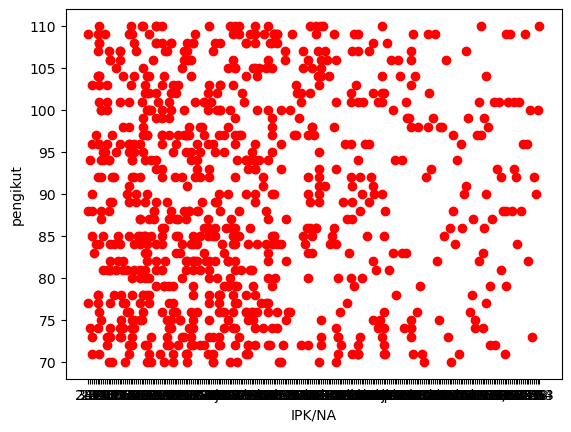

In [25]:
#Kita plot hubungannya

plt.scatter(cdata.IPK_NA, cdata.jumlah_pengikut,  color='red')
plt.xlabel("IPK/NA")
plt.ylabel("pengikut")
plt.show()

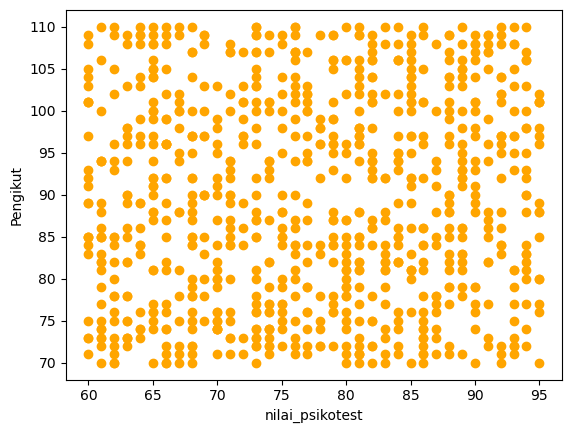

In [26]:
#Kita plot hubungannya

plt.scatter(cdata.nilai_psikotest, cdata.jumlah_pengikut,  color='orange')
plt.xlabel("nilai_psikotest")
plt.ylabel("Pengikut")
plt.show()

In [27]:
#Membagi data

msk = np.random.rand(len(data)) < 0.8
train = cdata[msk]
test = cdata[~msk]

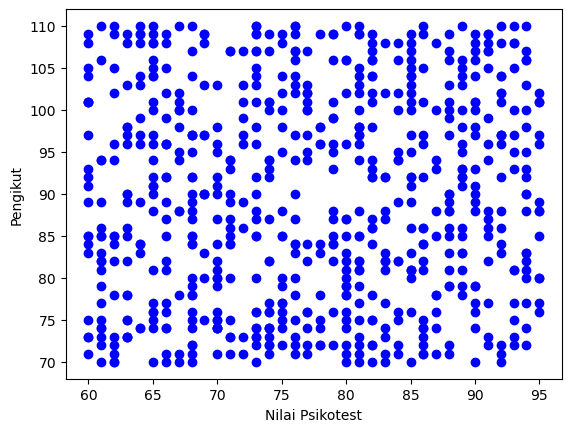

In [28]:
plt.scatter(train.nilai_psikotest, train.jumlah_pengikut,  color='blue')
plt.xlabel("Nilai Psikotest")
plt.ylabel("Pengikut")
plt.show()

In [29]:
#Membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['nilai_psikotest']])
train_y = np.asanyarray(train[['jumlah_pengikut']])
regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.0817833]]
Intercept:  [83.21667832]


Text(0, 0.5, 'Pengikut')

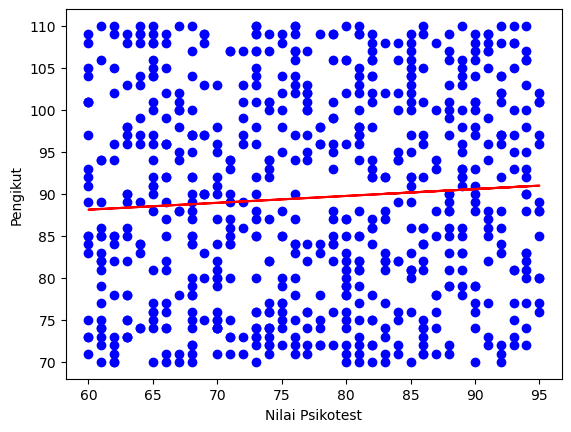

In [30]:
#Plot hasil regresi

plt.scatter(train.nilai_psikotest, train.jumlah_pengikut,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Nilai Psikotest")
plt.ylabel("Pengikut")

In [31]:
#Menghitung error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['nilai_psikotest']])
test_y = np.asanyarray(test[['jumlah_pengikut']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 9.89
Residual sum of squares (MSE): 129.56
R2-score: -196.82
